# Cosine Similarity : Spam/non-spam dataset

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Import dataset "SMS SpamCollection"

In [3]:
Spam_data = pd.read_csv("SMS SpamCollection.csv")

Spam_data.head()

,label,message
0,spam,- Rodger Burns - MSG = We tried to call you r...
1,ham,&lt;#&gt; in mca. But not conform.
2,ham,&lt;#&gt; mins but i had to stop somewhere f...
3,ham,&lt;DECIMAL&gt; m but its not a common car he...
4,spam,", Do you want a New Nokia i colour phone Deli..."


In [4]:
Spam_df = Spam_data[['label','message']]
Spam_df["message"] = Spam_df["message"].astype(str)
Spam_df.head()

,label,message
0,spam,- Rodger Burns - MSG = We tried to call you r...
1,ham,&lt;#&gt; in mca. But not conform.
2,ham,&lt;#&gt; mins but i had to stop somewhere f...
3,ham,&lt;DECIMAL&gt; m but its not a common car he...
4,spam,", Do you want a New Nokia i colour phone Deli..."


# a. Data Pre-processing 

### Data pre-processing was done to remove the noise present in data. 
### Pre-processing steps followed :
### i.    Conversion of the characters into lower case
### ii.   Removal of Punctuation
### iii.  Removal of Stopwords
### iv.  Removal of frequently occuring words
### v.   Removal of rare words

## i. Conversion of the characters into lower case

Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.


In [5]:
Spam_df["message_lower"] = Spam_df["message"].str.lower()
Spam_df["message_lower"]

0        - rodger burns - msg = we tried to call you r...
1                     &lt;#&gt;  in mca. but not conform.
2        &lt;#&gt;  mins but i had to stop somewhere f...
3        &lt;decimal&gt; m but its not a common car he...
4        , do you want a new nokia i colour phone deli...
                              ...                        
5568                              yup... how ü noe leh...
5569    yup... i havent been there before... you want ...
5570    yup... ok i go home look at the timings then i...
5571    yupz... i've oredi booked slots  my weekends l...
5572    zoe it just hit me  im fucking shitin myself i...
Name: message_lower, Length: 5573, dtype: object

In [6]:
Spam_df.head()

,label,message,message_lower
0,spam,- Rodger Burns - MSG = We tried to call you r...,- rodger burns - msg = we tried to call you r...
1,ham,&lt;#&gt; in mca. But not conform.,&lt;#&gt; in mca. but not conform.
2,ham,&lt;#&gt; mins but i had to stop somewhere f...,&lt;#&gt; mins but i had to stop somewhere f...
3,ham,&lt;DECIMAL&gt; m but its not a common car he...,&lt;decimal&gt; m but its not a common car he...
4,spam,", Do you want a New Nokia i colour phone Deli...",", do you want a new nokia i colour phone deli..."


## ii. Removal of Punctuation

Another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

It is important to choose the list of punctuations to exclude depending on the use case. 

In [7]:
### remove Punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

Spam_df["message_punctuation"] = Spam_df["message_lower"].apply(lambda text: remove_punctuation(text))
Spam_df.head()

,label,message,message_lower,message_punctuation
0,spam,- Rodger Burns - MSG = We tried to call you r...,- rodger burns - msg = we tried to call you r...,rodger burns msg we tried to call you re y...
1,ham,&lt;#&gt; in mca. But not conform.,&lt;#&gt; in mca. but not conform.,ltgt in mca but not conform
2,ham,&lt;#&gt; mins but i had to stop somewhere f...,&lt;#&gt; mins but i had to stop somewhere f...,ltgt mins but i had to stop somewhere first
3,ham,&lt;DECIMAL&gt; m but its not a common car he...,&lt;decimal&gt; m but its not a common car he...,ltdecimalgt m but its not a common car here s...
4,spam,", Do you want a New Nokia i colour phone Deli...",", do you want a new nokia i colour phone deli...",do you want a new nokia i colour phone deliv...


## iii. Removal of stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. 

### For example, the stopword list for english language from the nltk package can be seen below.

In [8]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [9]:
#### remove stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Spam_df["message_stopwords"] = Spam_df["message_punctuation"].apply(lambda text: remove_stopwords(text))
Spam_df.head()

,label,message,message_lower,message_punctuation,message_stopwords
0,spam,- Rodger Burns - MSG = We tried to call you r...,- rodger burns - msg = we tried to call you r...,rodger burns msg we tried to call you re y...,rodger burns msg tried call reply sms free nok...
1,ham,&lt;#&gt; in mca. But not conform.,&lt;#&gt; in mca. but not conform.,ltgt in mca but not conform,ltgt mca conform
2,ham,&lt;#&gt; mins but i had to stop somewhere f...,&lt;#&gt; mins but i had to stop somewhere f...,ltgt mins but i had to stop somewhere first,ltgt mins stop somewhere first
3,ham,&lt;DECIMAL&gt; m but its not a common car he...,&lt;decimal&gt; m but its not a common car he...,ltdecimalgt m but its not a common car here s...,ltdecimalgt common car better buy china asia f...
4,spam,", Do you want a New Nokia i colour phone Deli...",", do you want a new nokia i colour phone deli...",do you want a new nokia i colour phone deliv...,want new nokia colour phone deliveredtomorrow ...


## iv. Removal of Frequent words

In the previos preprocessing step, we removed the stopwords based on language information. But cases, where we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

So this step is to remove the frequent words in the given corpus. 
Let us get the most common words adn then remove them in the next step.

In [10]:
### Frequently occuring words

from collections import Counter
cnt = Counter()
for text in Spam_df["message_stopwords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('u', 1156),
 ('call', 580),
 ('im', 466),
 ('get', 390),
 ('ur', 390),
 ('dont', 287),
 ('go', 285),
 ('free', 278),
 ('ok', 278),
 ('ltgt', 276)]

In [11]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

Spam_df["message_stopwords_frequent"] = Spam_df["message_stopwords"].apply(lambda text: remove_freqwords(text))
Spam_df.head()

,label,message,message_lower,message_punctuation,message_stopwords,message_stopwords_frequent
0,spam,- Rodger Burns - MSG = We tried to call you r...,- rodger burns - msg = we tried to call you r...,rodger burns msg we tried to call you re y...,rodger burns msg tried call reply sms free nok...,rodger burns msg tried reply sms nokia mobile ...
1,ham,&lt;#&gt; in mca. But not conform.,&lt;#&gt; in mca. but not conform.,ltgt in mca but not conform,ltgt mca conform,mca conform
2,ham,&lt;#&gt; mins but i had to stop somewhere f...,&lt;#&gt; mins but i had to stop somewhere f...,ltgt mins but i had to stop somewhere first,ltgt mins stop somewhere first,mins stop somewhere first
3,ham,&lt;DECIMAL&gt; m but its not a common car he...,&lt;decimal&gt; m but its not a common car he...,ltdecimalgt m but its not a common car here s...,ltdecimalgt common car better buy china asia f...,ltdecimalgt common car better buy china asia f...
4,spam,", Do you want a New Nokia i colour phone Deli...",", do you want a new nokia i colour phone deli...",do you want a new nokia i colour phone deliv...,want new nokia colour phone deliveredtomorrow ...,want new nokia colour phone deliveredtomorrow ...


## v. Removal of Rare words

This is very similar to previous preprocessing step but we will remove the rare words from the corpus.

In [12]:
####  Rare words

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

Spam_df["message_stopwords_rare"] = Spam_df["message_stopwords_frequent"].apply(lambda text: remove_rarewords(text))
Spam_df.head()

,label,message,message_lower,message_punctuation,message_stopwords,message_stopwords_frequent,message_stopwords_rare
0,spam,- Rodger Burns - MSG = We tried to call you r...,- rodger burns - msg = we tried to call you r...,rodger burns msg we tried to call you re y...,rodger burns msg tried call reply sms free nok...,rodger burns msg tried reply sms nokia mobile ...,rodger burns msg tried reply sms nokia mobile ...
1,ham,&lt;#&gt; in mca. But not conform.,&lt;#&gt; in mca. but not conform.,ltgt in mca but not conform,ltgt mca conform,mca conform,mca conform
2,ham,&lt;#&gt; mins but i had to stop somewhere f...,&lt;#&gt; mins but i had to stop somewhere f...,ltgt mins but i had to stop somewhere first,ltgt mins stop somewhere first,mins stop somewhere first,mins stop somewhere first
3,ham,&lt;DECIMAL&gt; m but its not a common car he...,&lt;decimal&gt; m but its not a common car he...,ltdecimalgt m but its not a common car here s...,ltdecimalgt common car better buy china asia f...,ltdecimalgt common car better buy china asia f...,ltdecimalgt common car better buy china asia f...
4,spam,", Do you want a New Nokia i colour phone Deli...",", do you want a new nokia i colour phone deli...",do you want a new nokia i colour phone deliv...,want new nokia colour phone deliveredtomorrow ...,want new nokia colour phone deliveredtomorrow ...,want new nokia colour phone deliveredtomorrow ...


In [13]:
# Drop the columns which are no more needed 

Spam_df.drop(["message","message_lower", "message_punctuation","message_stopwords","message_stopwords_frequent"], axis=1, inplace=True)



In [14]:
# Keeping only the final column

Spam_df.head()

,label,message_stopwords_rare
0,spam,rodger burns msg tried reply sms nokia mobile ...
1,ham,mca conform
2,ham,mins stop somewhere first
3,ham,ltdecimalgt common car better buy china asia f...
4,spam,want new nokia colour phone deliveredtomorrow ...


In [15]:
# Renaming the final column

Spam_df.rename(columns = {'message_stopwords_rare':'messages'}, inplace = True) 

# Final Processed Data

In [16]:
Spam_df.head()

,label,messages
0,spam,rodger burns msg tried reply sms nokia mobile ...
1,ham,mca conform
2,ham,mins stop somewhere first
3,ham,ltdecimalgt common car better buy china asia f...
4,spam,want new nokia colour phone deliveredtomorrow ...


# Build the following models :

### b. Bernoulli Naïve Bayes using bigram tf-idf tokenization

### c. Bernoulli Naïve Bayes using bigram BOW(Bag of words) tokenization

### d. Multinomial Naïve Bayes using trigram BOW tokenization

Generating DTM (Document term matrix) using CountVectorizer module of scikit-learn.

#### tokenizer = Overrides the string tokenization step, we generatre tokenizer from NLTK's Regex tokenizer (by default: None)
#### lowercase = True (no need to use, as it is set True by default)
#### stop_words = 'english' (by default None is used, to improve the result we can provide custom made list of stop words)
#### ngram_range = (1,1) (by defualt its (1,1) i.e strictly monograms will be used, (2,2) only bigrams while (1,2) uses both)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(Spam_df['messages'])

## Splitting the dataset 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Spam_df['label'], test_size=0.25, random_state=5)


# Naive Bayes Algorithm

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

Bayes Theorem:
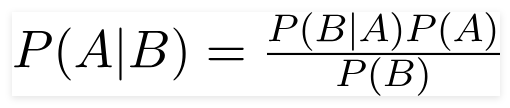

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

## Types of Naive Bayes Classifier:

### i. Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
### ii. Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
### iii. Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

### For our dataset, we have used 
### Multinomial Naive Bayes : MNB
### Bernoulli Naive Bayes  : BNB

## Multinomial Naive Bayes : MNB

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [28]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [22]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

96.41%


## Bernoulli Naive Bayes : BNB

In [23]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 95.84%


# b. TF-IDF: Term Frequency-Inverse Document Frequency

## TF : Term frequency 

TF: Term Frequency, measures how frequently a term occurs in a document.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

DF: Document Frequency, measures how frequently a term occurs in all documents.

DF(t) = Number of documents with term t in it / Total number of documents

IDF: Inverse Document Frequency, measures how important a term is in a corpus

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(Spam_df['messages'])

#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, Spam_df['label'],test_size=0.25,random_state=5)

#defining the model
#compilimg the model -> we are going to use already used models GNB, MNB, CNB, BNB
#fitting the model
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_mnb = 95.91%
accuracy_score_bnb = 96.05%


## c. Bernoulli Naïve Bayes using bigram BOW(Bag of words) tokenization

In [27]:
#from sklearn.feature_extraction import CountVectorizer
#from nltk.tokenize import RegexpTokenizer
#token = RegexpTokenizer(r'[A-Za-z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(Spam_df['messages'])

#from sklearn.model_selection import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Spam_df['label'],test_size=0.25, random_state=5)

#Defining the model-> we will use MultinomialNB

#Compiling the model -> We will import precompiled MNB from sklearn library
#from sklearn.naive_bayes import MultinomialNB 

#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Evaulating the model
#form sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

80.92%


## d. Multinomial Naïve Bayes using trigram BOW tokenization

In [28]:
#It shows only a marginal imporvement, let us try with trigram tokenization now:

cv = CountVectorizer(stop_words='english', ngram_range = (3,3), tokenizer = token.tokenize)
text_counts = cv.fit_transform(Spam_df['messages'])
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Spam_df['label'],test_size=0.25, random_state=5)
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

76.54%


# Accuracy of the models

### tf-idf MNB : 95.91%

### tf-idf BNB : 96.05%

### bigram tokenization : 80.92%

### trigram tokenization : 76.54%

The Bernoulli Naive Bayes tf-idf tokenization has the highest accuracy amongst all the models, with the accuracy being 96.05%. 

# 2. Cosine Similarity Calculation

In [51]:
import pandas as pd
import numpy as np

In [32]:
!pip3 install Gensim

You should consider upgrading via the 'c:\users\roma\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [33]:
!pip3 install textblob

You should consider upgrading via the 'c:\users\roma\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Considering the first 200 preprocessed messages from the dataset

In [55]:
### Importing the first 200 rows

Data = Spam_data.head(200)

In [56]:
### Filter out the "message" column

Data = Data['message']

In [57]:
Data.head()

0     - Rodger Burns - MSG = We tried to call you r...
1                  &lt;#&gt;  in mca. But not conform.
2     &lt;#&gt;  mins but i had to stop somewhere f...
3     &lt;DECIMAL&gt; m but its not a common car he...
4     , Do you want a New Nokia i colour phone Deli...
Name: message, dtype: object

### Conversion into List

tolist() : Returns a new List of string instances.

In [58]:
Data = Data.tolist()

## Append the entire list

In [59]:
res = [] 
for i in Data: 
    if i not in res: 
        res.append(i)

In [60]:
print ("The list after removing duplicates : " + str(res))

The list after removing duplicates : [' - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now  for delivery tomorrow', ' &lt;#&gt;  in mca. But not conform.', ' &lt;#&gt;  mins but i had to stop somewhere first.', ' &lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla', ' , Do you want a New Nokia i colour phone DeliveredTomorrow? With  free minutes to any mobile +  free texts + Free Camcorder reply or call .', ' =£ UK Break AccommodationVouchers terms & conditions apply.  claim you mustprovide your claim number which is  ', ' and  are premium phone services call ', ' and  picking them up from various points', ' and half years i missed your friendship:-)', ' at esplanade.. Do ü mind giving me a lift cos i got no car today..', " at the latest, g's still there if you can scrounge up some ammo and want to give the new ak a try", ' between 

# Import necessary packages

## TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. 
##  Cosine_Similarity - 
### Cosine similarity is a metric used to determine how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.Smaller the angle, higher the similarity.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Transformation of the list to feature vectors using Tfidf vectorizer

In [62]:
tf_idf = TfidfVectorizer()
trans = tf_idf.fit_transform(res)

## Applying the cosine_similarity to the transformed vector

In [63]:
cosine_similarity = cosine_similarity(trans)

In [64]:
print(cosine_similarity)

[[1.         0.         0.02936368 ... 0.         0.094808   0.        ]
 [0.         1.         0.24811677 ... 0.         0.04857442 0.        ]
 [0.02936368 0.24811677 1.         ... 0.         0.06336432 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.08284928 0.04627805]
 [0.094808   0.04857442 0.06336432 ... 0.08284928 1.         0.        ]
 [0.         0.         0.         ... 0.04627805 0.         1.        ]]


In [65]:
### Maximum value

cosine_similarity.max()

1.0000000000000007

In [66]:
### Minimum value

cosine_similarity.min()

0.0

## Extracting the Top 10 documents

In [67]:
cosine_similarity[np.diag_indices_from(cosine_similarity)] = 0.0 
idx = np.argsort(cosine_similarity, axis=None)[-10:] 
midx = np.unravel_index(idx, cosine_similarity.shape) 

In [68]:
### cosine_similarity of the 10 documents

print (cosine_similarity[midx])

[0.60684529 0.60684529 0.67086621 0.67086621 0.91100111 0.91100111
 0.96655821 0.96655821 1.         1.        ]


In [69]:
midx

(array([ 7, 69, 16, 15, 93, 94, 29, 30, 96, 97], dtype=int64),
 array([69,  7, 15, 16, 94, 93, 30, 29, 97, 96], dtype=int64))

# Conclusion :
## The top 5 pairs of similar documents are 
### pair1-(96,97)         
### pair2-(29,30)                   
### pair-3(93,94)          
### pair4(15,16)
### pair5-(7,69)